In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import *

In [59]:
import tensorflow as tf
from tensorflow import keras

In [60]:
print(tf.__version__)

2.18.0


In [61]:
np.random.seed(42)

In [62]:
data_ask=pd.read_csv('BARC.GBGBX_Candlestick_5_M_ASK_01.01.2023-07.12.2024.csv')
data_bid=pd.read_csv('BARC.GBGBX_Candlestick_5_M_BID_01.01.2023-07.12.2024.csv')

In [63]:
data_ask.head()


,Gmt time,Open,High,Low,Close,Volume
0,01.01.2023 00:00:00.000,159.229,159.229,159.229,159.229,0.0
1,01.01.2023 00:05:00.000,159.229,159.229,159.229,159.229,0.0
2,01.01.2023 00:10:00.000,159.229,159.229,159.229,159.229,0.0
3,01.01.2023 00:15:00.000,159.229,159.229,159.229,159.229,0.0
4,01.01.2023 00:20:00.000,159.229,159.229,159.229,159.229,0.0


In [64]:
data_bid.head()

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2023 00:00:00.000,159.171,159.171,159.171,159.171,0.0
1,01.01.2023 00:05:00.000,159.171,159.171,159.171,159.171,0.0
2,01.01.2023 00:10:00.000,159.171,159.171,159.171,159.171,0.0
3,01.01.2023 00:15:00.000,159.171,159.171,159.171,159.171,0.0
4,01.01.2023 00:20:00.000,159.171,159.171,159.171,159.171,0.0


In [65]:
data_ask

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2023 00:00:00.000,159.229,159.229,159.229,159.229,0.0
1,01.01.2023 00:05:00.000,159.229,159.229,159.229,159.229,0.0
2,01.01.2023 00:10:00.000,159.229,159.229,159.229,159.229,0.0
3,01.01.2023 00:15:00.000,159.229,159.229,159.229,159.229,0.0
4,01.01.2023 00:20:00.000,159.229,159.229,159.229,159.229,0.0
...,...,...,...,...,...,...
203611,07.12.2024 23:35:00.000,264.759,264.759,264.759,264.759,0.0
203612,07.12.2024 23:40:00.000,264.759,264.759,264.759,264.759,0.0
203613,07.12.2024 23:45:00.000,264.759,264.759,264.759,264.759,0.0
203614,07.12.2024 23:50:00.000,264.759,264.759,264.759,264.759,0.0


In [66]:
data_ask.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [67]:
data_ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203616 entries, 0 to 203615
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Gmt time  203616 non-null  object 
 1   Open      203616 non-null  float64
 2   High      203616 non-null  float64
 3   Low       203616 non-null  float64
 4   Close     203616 non-null  float64
 5   Volume    203616 non-null  float64
dtypes: float64(5), object(1)
memory usage: 9.3+ MB


In [68]:
data_bid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203616 entries, 0 to 203615
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Gmt time  203616 non-null  object 
 1   Open      203616 non-null  float64
 2   High      203616 non-null  float64
 3   Low       203616 non-null  float64
 4   Close     203616 non-null  float64
 5   Volume    203616 non-null  float64
dtypes: float64(5), object(1)
memory usage: 9.3+ MB


In [69]:
df=data_bid.merge(data_ask,left_on='Gmt time',right_on='Gmt time',how='outer')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203616 entries, 0 to 203615
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Gmt time  203616 non-null  object 
 1   Open_x    203616 non-null  float64
 2   High_x    203616 non-null  float64
 3   Low_x     203616 non-null  float64
 4   Close_x   203616 non-null  float64
 5   Volume_x  203616 non-null  float64
 6   Open_y    203616 non-null  float64
 7   High_y    203616 non-null  float64
 8   Low_y     203616 non-null  float64
 9   Close_y   203616 non-null  float64
 10  Volume_y  203616 non-null  float64
dtypes: float64(10), object(1)
memory usage: 17.1+ MB


In [71]:
df.columns

Index(['Gmt time', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume_y'],
      dtype='object')

In [72]:
import datetime

In [73]:
df['Local_time_T'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')


In [74]:
df


,Gmt time,Open_x,High_x,Low_x,Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y,Local_time_T
0,01.01.2023 00:00:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00
1,01.01.2023 00:05:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00
2,01.01.2023 00:10:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00
3,01.01.2023 00:15:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00
4,01.01.2023 00:20:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
203611,07.12.2024 23:35:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00
203612,07.12.2024 23:40:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00
203613,07.12.2024 23:45:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00
203614,07.12.2024 23:50:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00


In [75]:
df

,Gmt time,Open_x,High_x,Low_x,Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y,Local_time_T
0,01.01.2023 00:00:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00
1,01.01.2023 00:05:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00
2,01.01.2023 00:10:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00
3,01.01.2023 00:15:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00
4,01.01.2023 00:20:00.000,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
203611,07.12.2024 23:35:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00
203612,07.12.2024 23:40:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00
203613,07.12.2024 23:45:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00
203614,07.12.2024 23:50:00.000,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00


In [76]:
df=df.drop(['Gmt time'],axis=1)


In [77]:
df.columns = [ 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask','Local time']

In [78]:
df

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...
203611,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00
203612,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00
203613,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00
203614,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00


In [79]:
df['Local time']=pd.to_datetime(df['Local time'])


In [80]:
df

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...
203611,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00
203612,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00
203613,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00
203614,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00


In [81]:
df

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...
203611,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00
203612,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00
203613,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00
203614,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00


In [82]:
df.head(290)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...
285,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:45:00
286,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:50:00
287,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:55:00
288,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-02 00:00:00


In [83]:
df['Date'] = df['Local time'].dt.date

In [84]:
df['New_Day'] = df['Date'] != df['Date'].shift(1)

In [85]:
df

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time,Date,New_Day
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00,2023-01-01,True
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00,2023-01-01,False
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00,2023-01-01,False
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00,2023-01-01,False
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00,2023-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203611,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00,2024-12-07,False
203612,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00,2024-12-07,False
203613,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00,2024-12-07,False
203614,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00,2024-12-07,False


In [86]:

df['New_Day'] = df['New_Day'].astype(int)

In [87]:
df

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time,Date,New_Day
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00,2023-01-01,1
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00,2023-01-01,0
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00,2023-01-01,0
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00,2023-01-01,0
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203611,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:35:00,2024-12-07,0
203612,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:40:00,2024-12-07,0
203613,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:45:00,2024-12-07,0
203614,264.593,264.593,264.593,264.593,0.0,264.759,264.759,264.759,264.759,0.0,2024-12-07 23:50:00,2024-12-07,0


In [88]:
df.head(289)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time,Date,New_Day
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00,2023-01-01,1
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00,2023-01-01,0
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00,2023-01-01,0
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00,2023-01-01,0
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:40:00,2023-01-01,0
285,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:45:00,2023-01-01,0
286,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:50:00,2023-01-01,0
287,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 23:55:00,2023-01-01,0


In [89]:

df['Week_Number'] = df['Local time'].dt.isocalendar().week


df['New_Week'] = df['Week_Number'].ne(df['Week_Number'].shift())


In [90]:
df['New_Week'] = df['New_Week'].fillna(False)

In [91]:
df['New_Week']=df['New_Week'].astype(int)

In [92]:
df=df.drop(['Week_Number','Date'],axis=1)

In [93]:
df.head(2020)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time,New_Day,New_Week
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:00:00,1,0
1,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:05:00,0,0
2,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:10:00,0,0
3,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:15:00,0,0
4,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01 00:20:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,172.226,172.226,172.226,172.226,0.0,172.345,172.345,172.345,172.345,0.0,2023-01-07 23:55:00,0,0
2016,172.226,172.226,172.226,172.226,0.0,172.345,172.345,172.345,172.345,0.0,2023-01-08 00:00:00,1,0
2017,172.226,172.226,172.226,172.226,0.0,172.345,172.345,172.345,172.345,0.0,2023-01-08 00:05:00,0,0
2018,172.226,172.226,172.226,172.226,0.0,172.345,172.345,172.345,172.345,0.0,2023-01-08 00:10:00,0,0


In [94]:
df[df["New_Week"]==1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time,New_Day,New_Week
288,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-02,1,1
2304,172.226,172.226,172.226,172.226,0.0,172.345,172.345,172.345,172.345,0.0,2023-01-09,1,1
4320,180.930,180.930,180.930,180.930,0.0,180.987,180.987,180.987,180.987,0.0,2023-01-16,1,1
6336,178.435,178.435,178.435,178.435,0.0,178.552,178.552,178.552,178.552,0.0,2023-01-23,1,1
8352,185.407,185.407,185.407,185.407,0.0,185.514,185.514,185.514,185.514,0.0,2023-01-30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193824,240.186,240.186,240.186,240.186,0.0,240.362,240.362,240.362,240.362,0.0,2024-11-04,1,1
195840,250.789,250.789,250.789,250.789,0.0,250.910,250.910,250.910,250.910,0.0,2024-11-11,1,1
197856,258.395,258.395,258.395,258.395,0.0,258.512,258.512,258.512,258.512,0.0,2024-11-18,1,1
199872,257.043,257.043,257.043,257.043,0.0,257.205,257.205,257.205,257.205,0.0,2024-11-25,1,1


In [95]:
df[df["New_Day"]==1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local time,New_Day,New_Week
0,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-01,1,0
288,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-02,1,1
576,159.171,159.171,159.171,159.171,0.0,159.229,159.229,159.229,159.229,0.0,2023-01-03,1,0
864,163.730,163.730,163.730,163.730,0.0,163.825,163.825,163.825,163.825,0.0,2023-01-04,1,0
1152,168.186,168.186,168.186,168.186,0.0,168.246,168.246,168.246,168.246,0.0,2023-01-05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202176,262.739,262.739,262.739,262.739,0.0,262.908,262.908,262.908,262.908,0.0,2024-12-03,1,0
202464,265.499,265.499,265.499,265.499,0.0,265.613,265.613,265.613,265.613,0.0,2024-12-04,1,0
202752,262.649,262.649,262.649,262.649,0.0,262.761,262.761,262.761,262.761,0.0,2024-12-05,1,0
203040,267.199,267.199,267.199,267.199,0.0,267.311,267.311,267.311,267.311,0.0,2024-12-06,1,0


In [96]:
df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()



In [97]:
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]

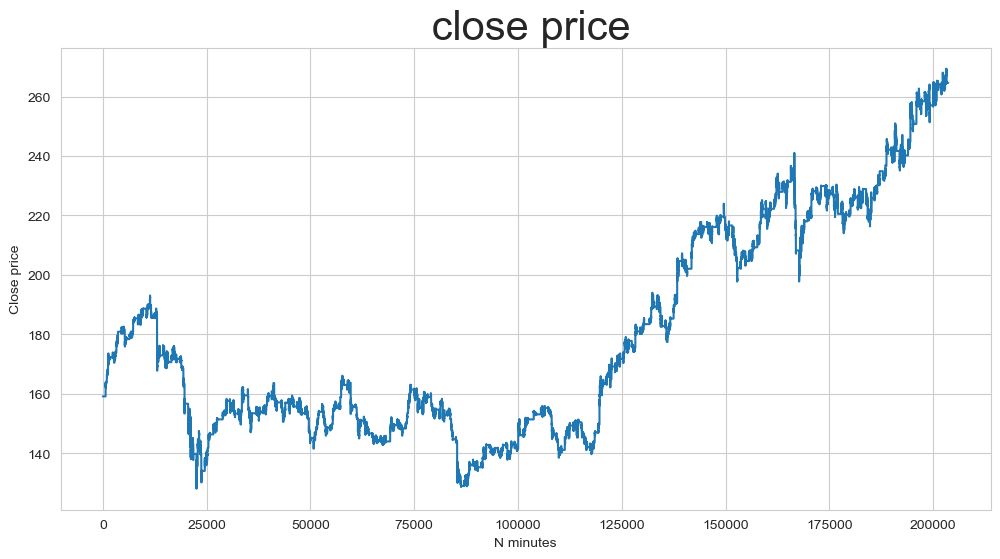

In [98]:
plt.figure(figsize=(12,6))
plt.plot(df['Close_Bid'])
plt.title(' close price')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

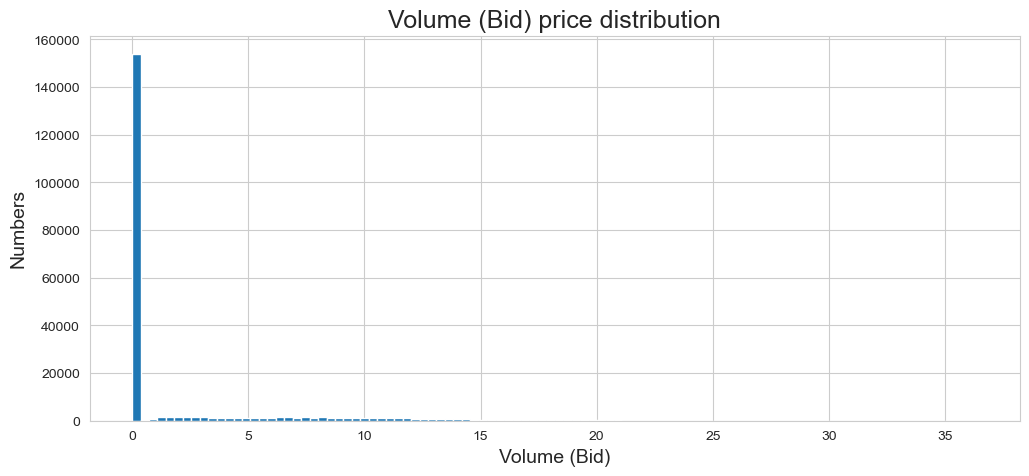

In [99]:
plt.figure(num=1,figsize=(12,5))
plt.hist(df['Volume_Bid'],bins=100)
plt.title('Volume (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);

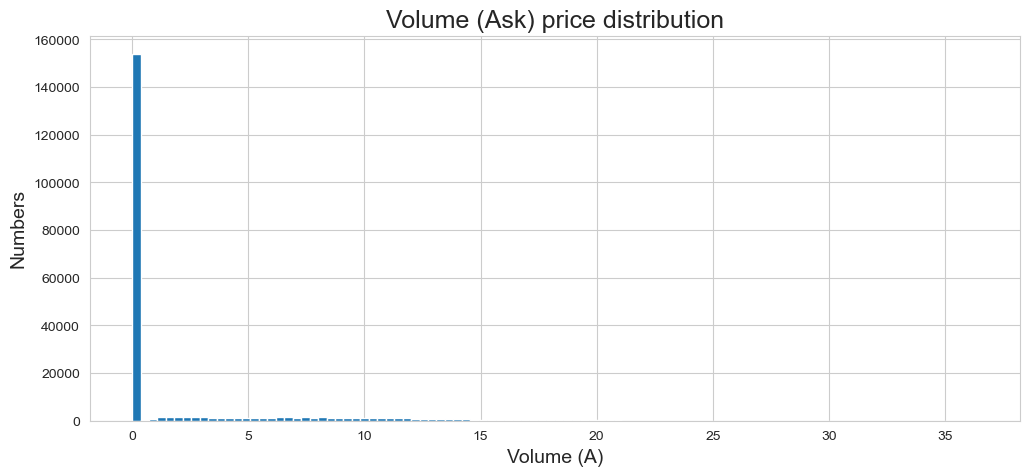

In [100]:
plt.figure(num=1,figsize=(12,5))
plt.hist(df['Volume_Bid'],bins=100)
plt.title('Volume (Ask) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (A)',size=14);

C:\Users\Welcome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x500 with 0 Axes>

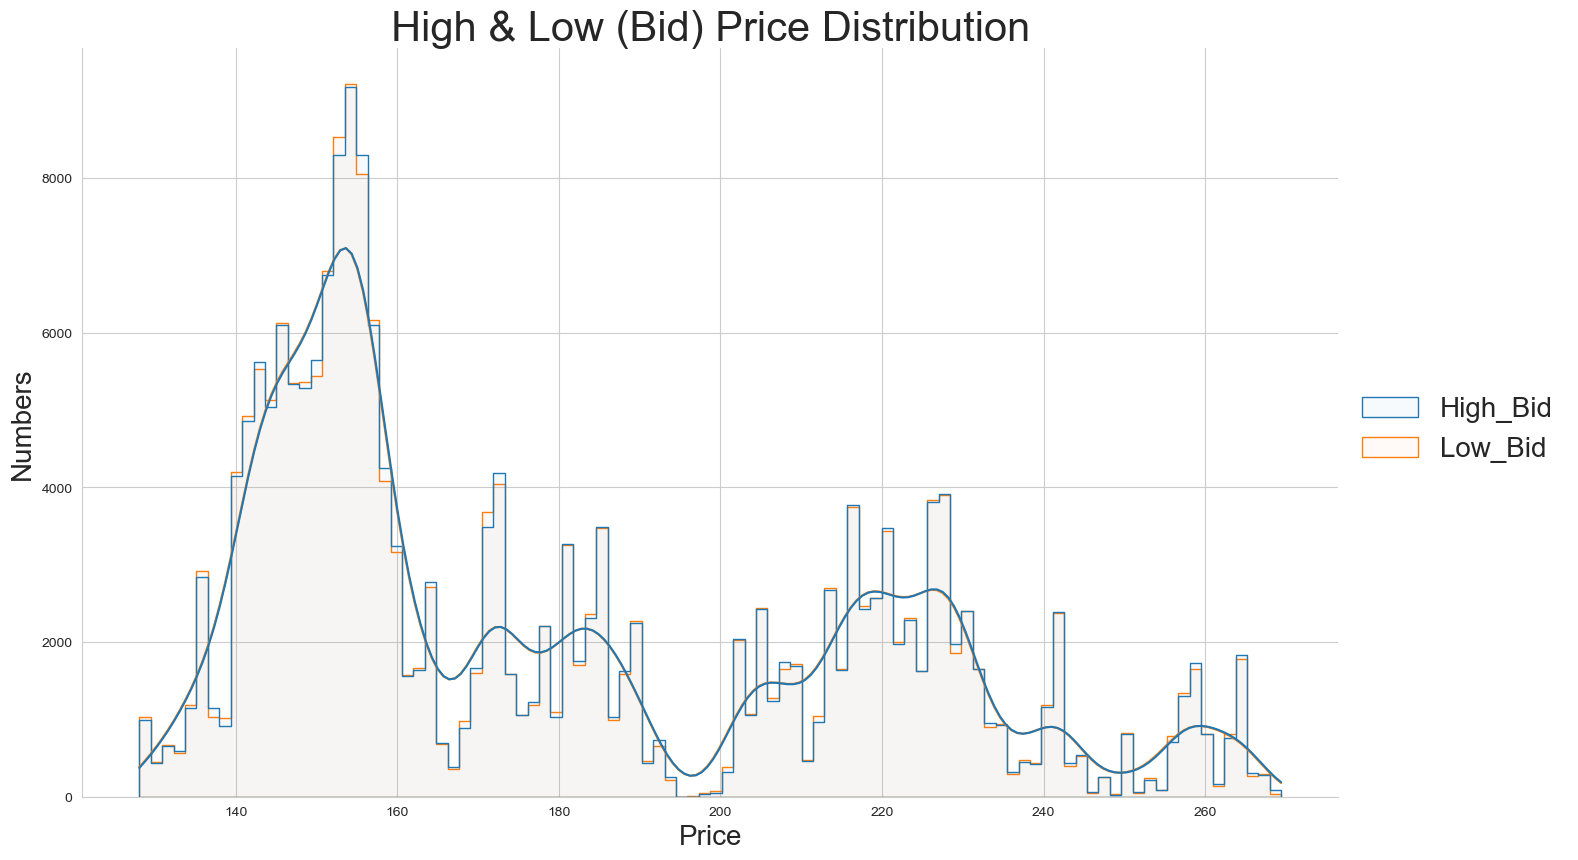

In [101]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            df[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

In [102]:
data=df.drop(['Open_Ask','High_Ask','Low_Ask','Close_Ask','Local time'],axis=1) 

In [103]:
data

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,New_Day,New_Week,Volume_Delta,Volume_Delta_abs,High_Delta,Low_Delta,Close_Delta,Open_Delta
0,159.171,159.171,159.171,159.171,0.0,0.0,1,0,0.0,0.0,0.058,0.058,0.058,0.058
1,159.171,159.171,159.171,159.171,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
2,159.171,159.171,159.171,159.171,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
3,159.171,159.171,159.171,159.171,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
4,159.171,159.171,159.171,159.171,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203611,264.593,264.593,264.593,264.593,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203612,264.593,264.593,264.593,264.593,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203613,264.593,264.593,264.593,264.593,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203614,264.593,264.593,264.593,264.593,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166


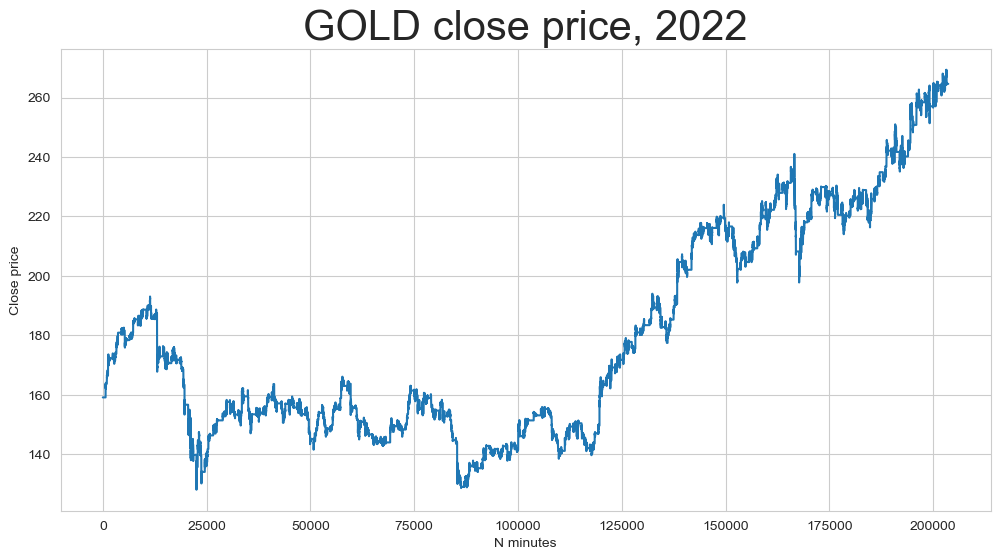

In [104]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('GOLD close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

In [105]:
data['Y_High_Bid']=data['High_Bid']
data['Y_Low_Ask']=data['Low_Bid']+data['Low_Delta']

In [106]:

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_Day', 'New_Week']

In [107]:
for column in columns_float:
    data[column]=pd.to_numeric(data[column],downcast='float')
for column in columns_integer:
    data[column]=pd.to_numeric(data[column],downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203616 entries, 0 to 203615
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          203616 non-null  float32
 1   High_Bid          203616 non-null  float32
 2   Low_Bid           203616 non-null  float32
 3   Close_Bid         203616 non-null  float32
 4   Volume_Bid        203616 non-null  float32
 5   Volume_Ask        203616 non-null  float32
 6   New_Day           203616 non-null  int8   
 7   New_Week          203616 non-null  int8   
 8   Volume_Delta      203616 non-null  float32
 9   Volume_Delta_abs  203616 non-null  float32
 10  High_Delta        203616 non-null  float32
 11  Low_Delta         203616 non-null  float32
 12  Close_Delta       203616 non-null  float32
 13  Open_Delta        203616 non-null  float32
 14  Y_High_Bid        203616 non-null  float32
 15  Y_Low_Ask         203616 non-null  float32
dtypes: float32(14), int8

In [108]:
data.columns

Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Volume_Ask', 'New_Day', 'New_Week', 'Volume_Delta', 'Volume_Delta_abs',
       'High_Delta', 'Low_Delta', 'Close_Delta', 'Open_Delta', 'Y_High_Bid',
       'Y_Low_Ask'],
      dtype='object')

In [109]:
data['Y_High_Bid']=data['Y_High_Bid'].shift(-1)
data['Y_Low_Ask']=data['Y_Low_Ask'].shift(-1)

In [110]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)
data['Y_High_Bid_5'] = data['Y_High_Bid'].rolling(window=indexer).max()
data['Y_Low_Ask_5']  = data['Y_Low_Ask'].rolling(window=indexer).min()


In [111]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,New_Day,New_Week,Volume_Delta,Volume_Delta_abs,High_Delta,Low_Delta,Close_Delta,Open_Delta,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
203611,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203612,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203613,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203614,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203615,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,NaN,NaN,NaN,NaN


In [112]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,New_Day,New_Week,Volume_Delta,Volume_Delta_abs,High_Delta,Low_Delta,Close_Delta,Open_Delta,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
203611,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203612,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203613,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203614,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,NaN,NaN
203615,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,NaN,NaN,NaN,NaN


In [113]:
data.dropna(inplace=True)  


In [114]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,New_Day,New_Week,Volume_Delta,Volume_Delta_abs,High_Delta,Low_Delta,Close_Delta,Open_Delta,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
203606,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,264.592987,264.759003
203607,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,264.592987,264.759003
203608,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,264.592987,264.759003
203609,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,264.592987,264.759003
203610,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166,264.592987,264.759003,264.592987,264.759003


In [115]:
data.columns

Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Volume_Ask', 'New_Day', 'New_Week', 'Volume_Delta', 'Volume_Delta_abs',
       'High_Delta', 'Low_Delta', 'Close_Delta', 'Open_Delta', 'Y_High_Bid',
       'Y_Low_Ask', 'Y_High_Bid_5', 'Y_Low_Ask_5'],
      dtype='object')

In [116]:
data_ay=data[['Y_High_Bid','Y_Low_Ask']]

In [117]:
data_ip=data.drop(['Y_High_Bid','Y_Low_Ask','Y_High_Bid_5','Y_Low_Ask_5'],axis=1)

In [118]:
data_ip

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,New_Day,New_Week,Volume_Delta,Volume_Delta_abs,High_Delta,Low_Delta,Close_Delta,Open_Delta
0,159.171005,159.171005,159.171005,159.171005,0.0,0.0,1,0,0.0,0.0,0.058,0.058,0.058,0.058
1,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
2,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
3,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
4,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203606,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203607,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203608,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203609,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166


In [119]:
data_ip

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,New_Day,New_Week,Volume_Delta,Volume_Delta_abs,High_Delta,Low_Delta,Close_Delta,Open_Delta
0,159.171005,159.171005,159.171005,159.171005,0.0,0.0,1,0,0.0,0.0,0.058,0.058,0.058,0.058
1,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
2,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
3,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
4,159.171005,159.171005,159.171005,159.171005,0.0,0.0,0,0,0.0,0.0,0.058,0.058,0.058,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203606,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203607,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203608,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166
203609,264.592987,264.592987,264.592987,264.592987,0.0,0.0,0,0,0.0,0.0,0.166,0.166,0.166,0.166


In [120]:
data_ip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203611 entries, 0 to 203610
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          203611 non-null  float32
 1   High_Bid          203611 non-null  float32
 2   Low_Bid           203611 non-null  float32
 3   Close_Bid         203611 non-null  float32
 4   Volume_Bid        203611 non-null  float32
 5   Volume_Ask        203611 non-null  float32
 6   New_Day           203611 non-null  int8   
 7   New_Week          203611 non-null  int8   
 8   Volume_Delta      203611 non-null  float32
 9   Volume_Delta_abs  203611 non-null  float32
 10  High_Delta        203611 non-null  float32
 11  Low_Delta         203611 non-null  float32
 12  Close_Delta       203611 non-null  float32
 13  Open_Delta        203611 non-null  float32
dtypes: float32(12), int8(2)
memory usage: 11.3 MB


In [121]:
# Filling missing values with 0 or any specific value
data_ip = data_ip.fillna(0)


In [122]:
data_ay = data_ay.fillna(0)

In [123]:
data_length=len(data)
data_length

203611

In [124]:
train_size=int(round(data_length*0.8,-3))
train_size

163000

In [125]:
train=data_ip.iloc[:train_size]
train.shape



(163000, 14)

prep for LSTM

In [126]:
max_price=(train['High_Bid']+train['High_Delta']).max()
max_price

234.3140106201172

In [127]:
min_price=train['Low_Bid'].min()
min_price

128.08599853515625

In [128]:
max_volume=max(max(train['Volume_Bid']),max(train['Volume_Ask']))
max_volume

34.79999923706055

In [129]:
max_Delta=max(max(train['Open_Delta']),max(train['High_Delta']),max(train['Low_Delta']),max(train['Close_Delta']))
max_Delta

1.5219999551773071

In [130]:
max_Delta=round(max_Delta,3)
max_Delta

1.522

In [131]:
min_Delta=min(min(train['Open_Delta']),max(train['High_Delta']),max(train['Low_Delta']),max(train['Close_Delta']))
min_Delta

0.008999999612569809

In [132]:
min_Delta=round(min_Delta,3)
min_Delta

0.009

In [133]:
max_volume_Delta=train['Volume_Delta'].max()
max_volume_Delta


6.609300136566162

In [134]:
min_volume_Delta=train['Volume_Delta'].min()
min_volume_Delta

-6.9120001792907715

In [135]:
min_volume_Delta_abs=train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [136]:
max_volume_Delta_abs=train['Volume_Delta_abs'].max()
max_volume_Delta_abs

6.9120001792907715

In [137]:
data_ip['Open_Bid'] = ( data_ip['Open_Bid'] - min_price ) / (max_price-min_price)
data_ip['High_Bid']  = ( data_ip['High_Bid']  - min_price ) / (max_price-min_price)
data_ip['Low_Bid']   = ( data_ip['Low_Bid']   - min_price ) / (max_price-min_price)
data_ip['Close_Bid'] = ( data_ip['Close_Bid'] - min_price ) / (max_price-min_price)
data_ay['Y_High_Bid'] = ( data_ay['Y_High_Bid'] - min_price ) / (max_price-min_price)
data_ay['Y_Low_Ask']  = ( data_ay['Y_Low_Ask']  - min_price ) / (max_price-min_price)

In [138]:
data_ip['Volume_Ask']  = data_ip['Volume_Ask'] / max_volume
data_ip['Volume_Bid']  = data_ip['Volume_Bid'] / max_volume

In [139]:
data_ip['Volume_Delta'] = ( data_ip['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [140]:
data_ip['Volume_Delta_abs']  = data_ip['Volume_Delta_abs'] / max_volume_Delta_abs

In [141]:
data_ip['Open_Delta']  = ( max_Delta - data_ip['Open_Delta'] )  / (max_Delta-min_Delta)
data_ip['High_Delta']  = ( max_Delta - data_ip['High_Delta'] )  / (max_Delta-min_Delta)
data_ip['Low_Delta']   = ( max_Delta - data_ip['Low_Delta'] )   / (max_Delta-min_Delta)
data_ip['Close_Delta'] = ( max_Delta - data_ip['Close_Delta'] ) / (max_Delta-min_Delta)

In [142]:
df_a = np.array(data_ip) 

with np.printoptions(precision=4):
    print("df_a:")
    print(df_a[:2,:])  
    print('\n')
    print(df_a[-2:,:]) 

print("numpy size: = ", df_a.shape)
print("type: ", df_a.dtype) 


df_a:
[[0.2926 0.2926 0.2926 0.2926 0.     0.     1.     0.     0.5112 0.
  0.9676 0.9676 0.9676 0.9676]
 [0.2926 0.2926 0.2926 0.2926 0.     0.     0.     0.     0.5112 0.
  0.9676 0.9676 0.9676 0.9676]]


[[1.285  1.285  1.285  1.285  0.     0.     0.     0.     0.5112 0.
  0.8962 0.8962 0.8962 0.8962]
 [1.285  1.285  1.285  1.285  0.     0.     0.     0.     0.5112 0.
  0.8962 0.8962 0.8962 0.8962]]
numpy size: =  (203611, 14)
type:  float32


In [143]:
df_y = np.array(data_ay) 

print("df_y")
print(df_y[:3,:])  
print('\n')
print(df_y[-3:,:]) 

print("numpy size: = ", df_y.shape)
print("type: ", df_y.dtype) 

df_y
[[0.29262534 0.29317132]
 [0.29262534 0.29317132]
 [0.29262534 0.29317132]]


[[1.2850376 1.2866005]
 [1.2850376 1.2866005]
 [1.2850376 1.2866005]]
numpy size: =  (203611, 2)
type:  float32


In [144]:
from tqdm import tqdm

In [145]:
n_small=30000
N=50
L=n_small-N
t=df_a.shape[1]
print('Size  of a three-dimensional inputs tensor:',L,N,t)

Size  of a three-dimensional inputs tensor: 29950 50 14


In [146]:
data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [147]:
Y = np.zeros((L, 2), dtype= 'float32')

In [148]:
print('L = n_small - N - 5 = ', n_small-N-5, L)

for k in tqdm(range(L)):
    data_b[k, :, :] = df_a[k:k+N, :]   
                                          
    Y[k,0] = df_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = df_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 77017.74it/s]

29949
data_b: 
 [[[0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  ...
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]]

 [[0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  ...
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]]

 [[0.29262534 0.29262534 0.29262534 ... 0.967614   0.967614   0.967614  ]
  [0.2

In [149]:

import random

pp = random.randint(50, L)
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  28989
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727
0.2319727 		 0.2319727


In [150]:
from sklearn.model_selection import train_test_split


In [151]:
X_train,X_test,y_train,y_test = train_test_split(data_b,Y,test_size=0.1,shuffle=False,stratify=None,random_state=101)

In [152]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 14)
(26955, 2)
(2995, 50, 14)
(2995, 2)


In [153]:
model=keras.Sequential([
    keras.layers.LSTM(100,activation='relu',input_shape=(50,14)),
    keras.layers.Dense(2)
])

C:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [154]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,202 (180.48 KB)

 Trainable params: 46,202 (180.48 KB)

 Non-trainable params: 0 (0.00 B)

None


In [155]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [156]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [157]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_LSTM_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [158]:
history=model.fit(X_train,y_train,batch_size=20,epochs=20,validation_split=0.1,shuffle=True,verbose=1,callbacks=[es,mc])

Epoch 1/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0027 - mae: 0.0169
Epoch 1: val_loss improved from inf to 0.00002, saving model to best_LSTM_model.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 59s 41ms/step - loss: 0.0027 - mae: 0.0168 - val_loss: 2.4548e-05 - val_mae: 0.0042
Epoch 2/20
1211/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.8984e-05 - mae: 0.0028
Epoch 2: val_loss did not improve from 0.00002
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 51s 42ms/step - loss: 1.8985e-05 - mae: 0.0028 - val_loss: 3.0502e-05 - val_mae: 0.0048
Epoch 3/20
1212/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.8546e-05 - mae: 0.0027
Epoch 3: val_loss improved from 0.00002 to 0.00001, saving model to best_LSTM_model.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 1.8541e-05 - mae: 0.0027 - val_loss: 9.4369e-06 - val_mae: 0.0022
Epoch 4/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.7154e-05 - mae: 0.0026
Epoch 4: val_loss did not improve from 0.00001
1213/1213 ━━━━━━━━━━━━━━━━━━━

In [159]:
LSTM_saved_best_model=keras.models.load_model('best_LSTM_model.keras')

In [160]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3808e-06 - mae: 7.3413e-04


In [161]:
print("Mean squared error (mse): %.9f " % (scores[0]))

Mean squared error (mse): 0.000001256 


In [162]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean absolute error (mae): 0.000696808 


Text(0.5, 0, 'Mean Squared_Error')

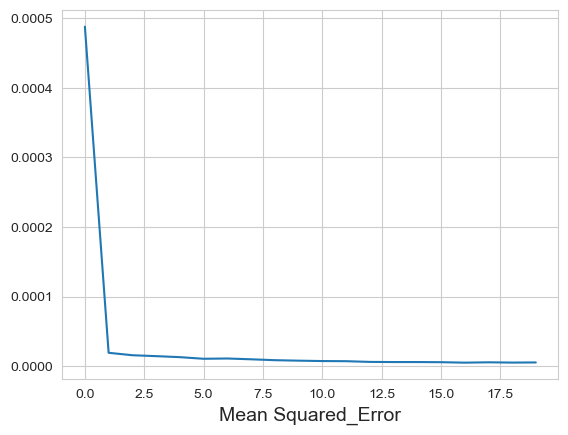

In [163]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared_Error',size=14)

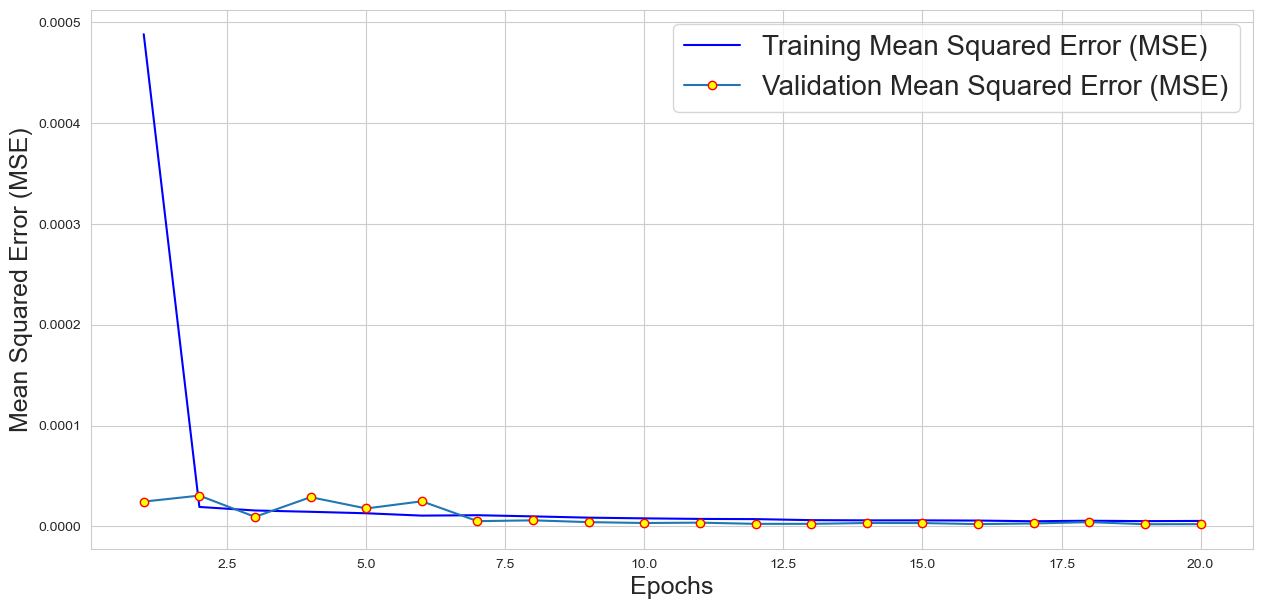

In [164]:
history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

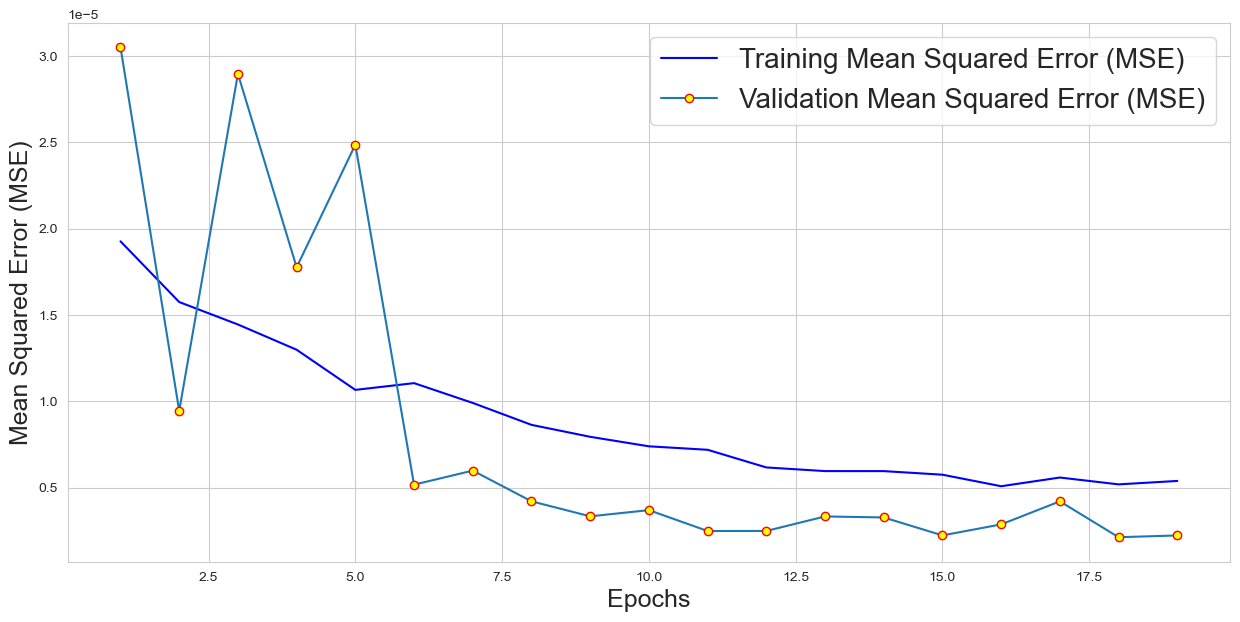

In [165]:


history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

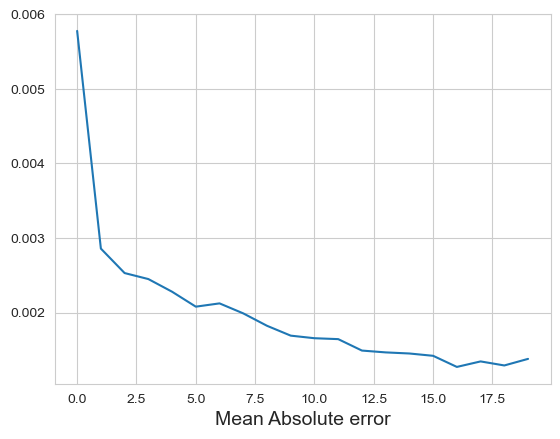

In [166]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
plt.show()

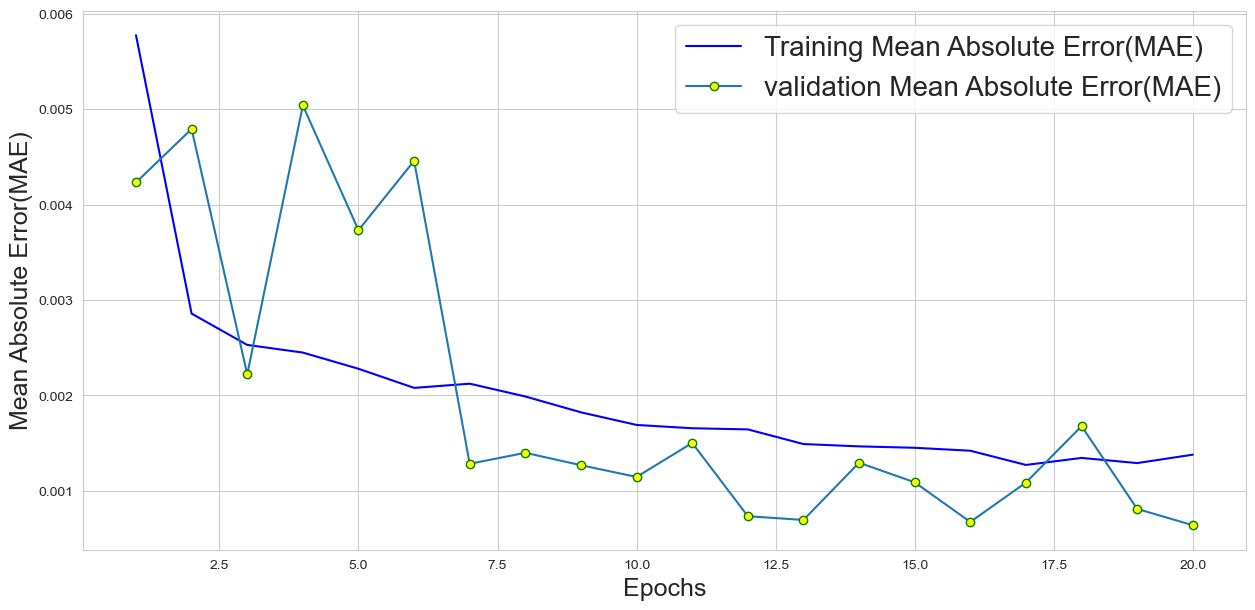

In [167]:
history_dict =  history.history
mae_values=history_dict['mae']
val_mae_values=history_dict['val_mae']
epochs=range(1,len(mae_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mae_values,'b',label='Training Mean Absolute Error(MAE)')
plt.plot(epochs,val_mae_values,marker='o',markeredgecolor='green',markerfacecolor='yellow',label='validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs',size=18)
plt.ylabel('Mean Absolute Error(MAE)',size=18)
plt.legend()
plt.show()

In [168]:
pred=LSTM_saved_best_model(X_test)
print(pred)

tf.Tensor(
[[0.17721814 0.17907178]
 [0.17721808 0.17907171]
 [0.17721802 0.17907164]
 ...
 [0.27793473 0.2796123 ]
 [0.27793473 0.2796123 ]
 [0.27793473 0.2796123 ]], shape=(2995, 2), dtype=float32)


In [169]:
# Create a bar chart to visualize the error metrics
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"LSTM Test MSE: {test_loss:.4f}")
print(f"LSTM Test MAE: {test_mae:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2555e-06 - mae: 3.9622e-04
LSTM Test MSE: 0.0000
LSTM Test MAE: 0.0004


In [170]:
cnn_model = keras.Sequential([
    keras.layers.Conv1D(50,9, padding='same',input_shape=(50,14), activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7, padding='same', activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25, activation=tf.nn.relu, kernel_initializer="normal"),
    
    keras.layers.Dense(2)
])

print(cnn_model.summary())

C:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 50)         │         6,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 100)         │        35,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,027 (171.98 KB)

 Trainable params: 44,027 (171.98 KB)

 Non-trainable params: 0 (0.00 B)

None


In [171]:
cnn_model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [172]:
es1 = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)
mc1 = ModelCheckpoint('best_cnn_Model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [173]:
eval=cnn_model.fit(X_train,y_train,batch_size=30,epochs=20,validation_split=0.2,verbose=1,callbacks=[es1,mc1])

Epoch 1/20
713/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 - mae: 0.0503
Epoch 1: val_loss improved from inf to 0.00016, saving model to best_cnn_Model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0137 - mae: 0.0499 - val_loss: 1.6456e-04 - val_mae: 0.0087
Epoch 2/20
712/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4190e-05 - mae: 0.0057
Epoch 2: val_loss improved from 0.00016 to 0.00015, saving model to best_cnn_Model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.4225e-05 - mae: 0.0057 - val_loss: 1.5278e-04 - val_mae: 0.0085
Epoch 3/20
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7206e-05 - mae: 0.0052
Epoch 3: val_loss improved from 0.00015 to 0.00015, saving model to best_cnn_Model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.7150e-05 - mae: 0.0052 - val_loss: 1.5105e-04 - val_mae: 0.0088
Epoch 4/20
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3209e-05 - mae: 0.0054
Epoch 4: val_loss did not improve from 0.00015
719/719 ━━━━━

In [174]:
cnn_saved_best_model=keras.models.load_model('best_cnn_Model.keras')

In [175]:
scor = cnn_saved_best_model.evaluate(X_test, y_test, verbose=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0024e-05 - mae: 0.0017


In [176]:
print("Mean squared error (mse): %.9f " % (scor[0]))

Mean squared error (mse): 0.000006939 


In [177]:

print("Mean absolute error (mae): %.9f " % (scor[1]))

Mean absolute error (mae): 0.001464333 


Text(0.5, 0, 'Mean Squared_Error')

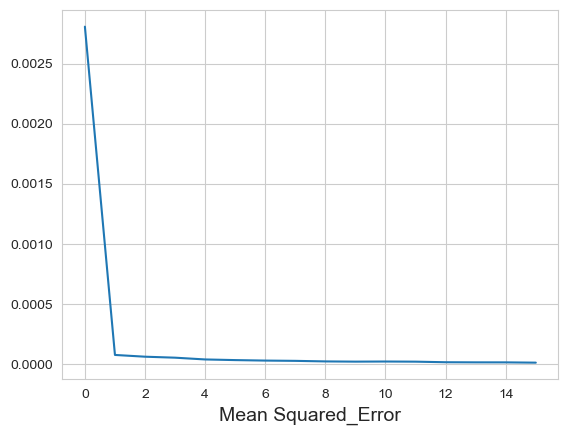

In [178]:
plt.plot(eval.history['loss'])
plt.xlabel('Mean Squared_Error',size=14)

In [179]:
cnn_mse= eval.history['loss'][-1]


In [180]:
print(cnn_mse)

1.3115965884935576e-05


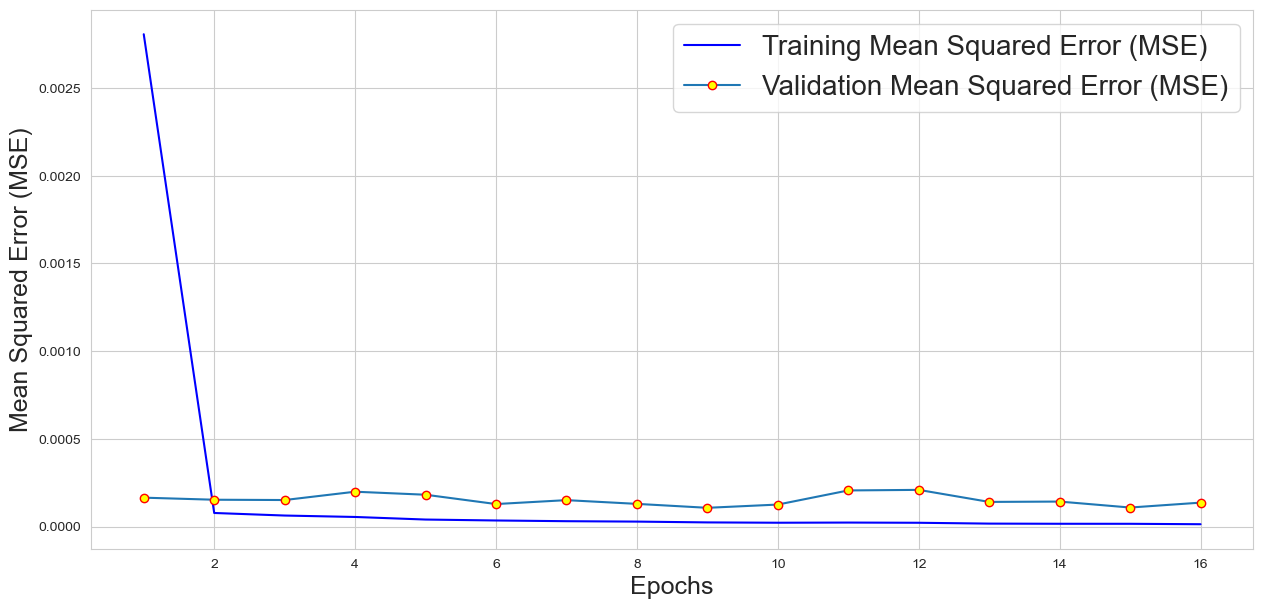

In [181]:
eval_dict = eval.history

mse_values = eval_dict['loss']
val_mse_values = eval_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

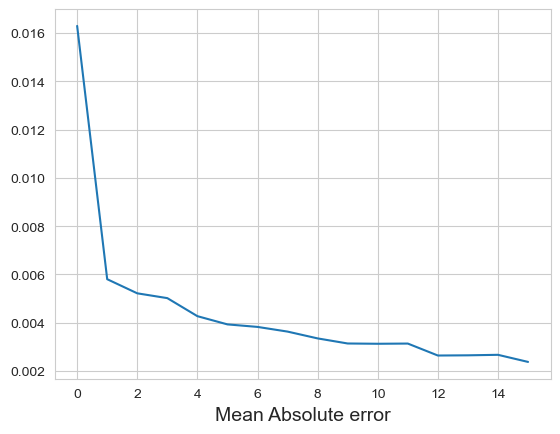

In [182]:
plt.plot(eval.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
plt.show()

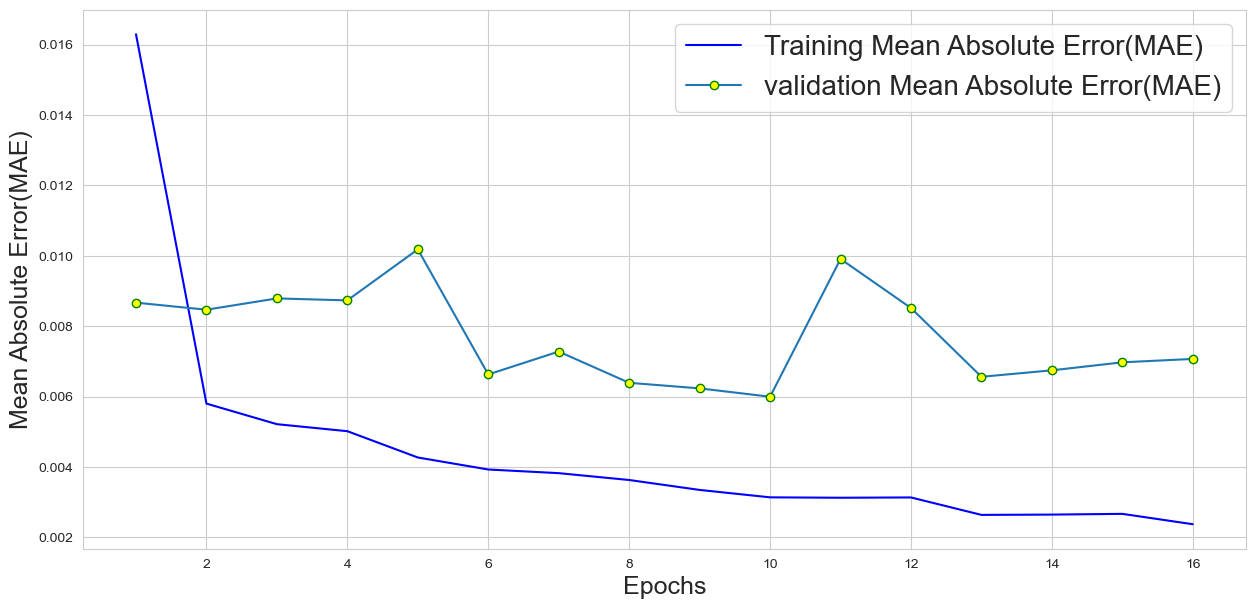

In [183]:
eval_dict =  eval.history
mae_values=eval_dict['mae']
val_mae_values=eval_dict['val_mae']
epochs=range(1,len(mae_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mae_values,'b',label='Training Mean Absolute Error(MAE)')
plt.plot(epochs,val_mae_values,marker='o',markeredgecolor='green',markerfacecolor='yellow',label='validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs',size=18)
plt.ylabel('Mean Absolute Error(MAE)',size=18)
plt.legend()
plt.show()

In [184]:
prediction=cnn_saved_best_model(X_test)
print(prediction)

tf.Tensor(
[[0.1779063  0.17987871]
 [0.17769651 0.18027231]
 [0.17800985 0.18052576]
 ...
 [0.28033668 0.28270468]
 [0.2796198  0.2817891 ]
 [0.27986228 0.28193706]], shape=(2995, 2), dtype=float32)


In [185]:
mlp_model=keras.Sequential([
    keras.layers.Dense(1024,input_dim=500,activation=tf.nn.relu,kernel_initializer="normal"),
      keras.layers.Dense(512,activation='relu',kernel_initializer="normal"),
    keras.layers.Dense(256,activation='relu',kernel_initializer="normal"),
    keras.layers.Dense(128,activation='relu',kernel_initializer="normal"),
    keras.layers.Dense(1)
])
print(mlp_model.summary())

C:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1024)           │       513,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,177 (4.59 MB)

 Trainable params: 1,202,177 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

None


In [186]:
mlp_model.compile(optimizer='adam',loss='mse',metrics=["mae"])

In [187]:

mc2 = ModelCheckpoint('best_mlp_Model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [188]:
mlp_history=model.fit(X_train,y_train,batch_size=10,epochs=20,validation_split=0.4,verbose=1,callbacks=[es1,mc2])

Epoch 1/20
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.7518e-06 - mae: 0.0014
Epoch 1: val_loss improved from inf to 0.00015, saving model to best_mlp_Model.keras
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 3.7527e-06 - mae: 0.0014 - val_loss: 1.5439e-04 - val_mae: 0.0123
Epoch 2/20
1617/1618 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4688e-06 - mae: 0.0017
Epoch 2: val_loss improved from 0.00015 to 0.00000, saving model to best_mlp_Model.keras
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 8.4651e-06 - mae: 0.0017 - val_loss: 3.9564e-06 - val_mae: 8.1896e-04
Epoch 3/20
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3861e-06 - mae: 0.0013
Epoch 3: val_loss did not improve from 0.00000
1618/1618 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - loss: 5.3856e-06 - mae: 0.0013 - val_loss: 8.6531e-06 - val_mae: 0.0022
Epoch 4/20
1615/1618 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.9075e-06 - mae: 0.0015
Epoch 4: val_loss did not improve from 0.00000
1618/1618 ━━━━━━━━━

In [189]:
mlp_saved_best_model=keras.models.load_model('best_mlp_Model.keras')

In [208]:
score1 = mlp_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5250e-06 - mae: 7.6094e-04


In [209]:
print("Mean squared error (mse): %.9f " % (score1[0]))

Mean squared error (mse): 0.000001311 


In [210]:
print("Mean absolute error (mae): %.9f " % (score1[1]))

Mean absolute error (mae): 0.000739381 


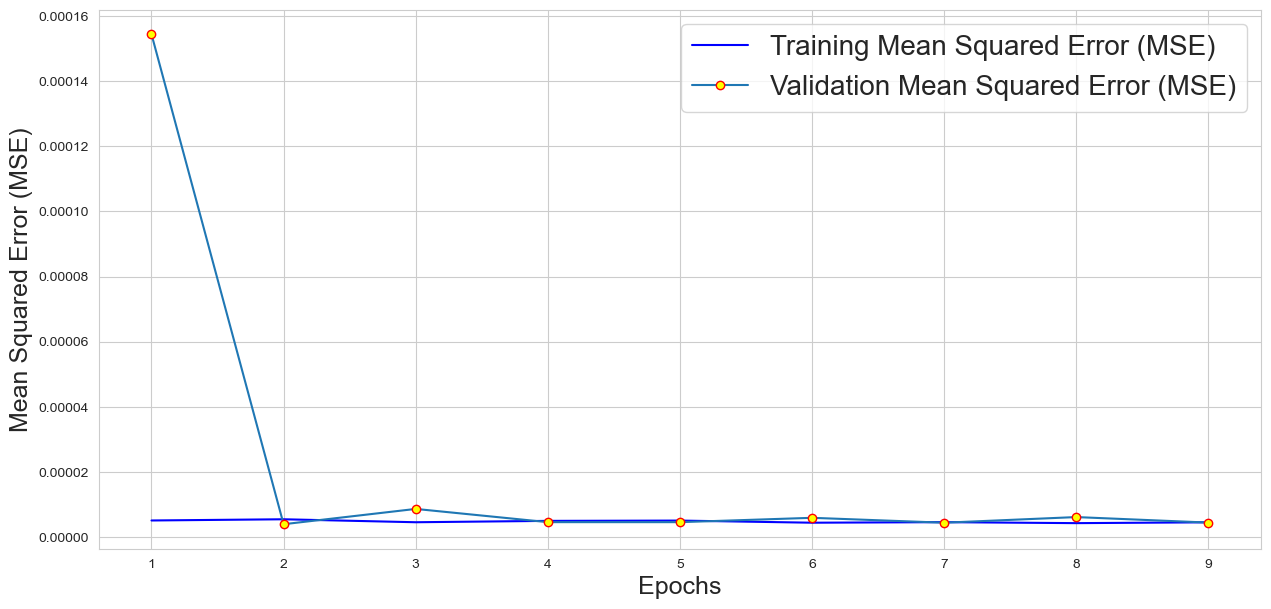

In [222]:
eval_dict = mlp_history.history

mse_values = eval_dict['loss']
val_mse_values = eval_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

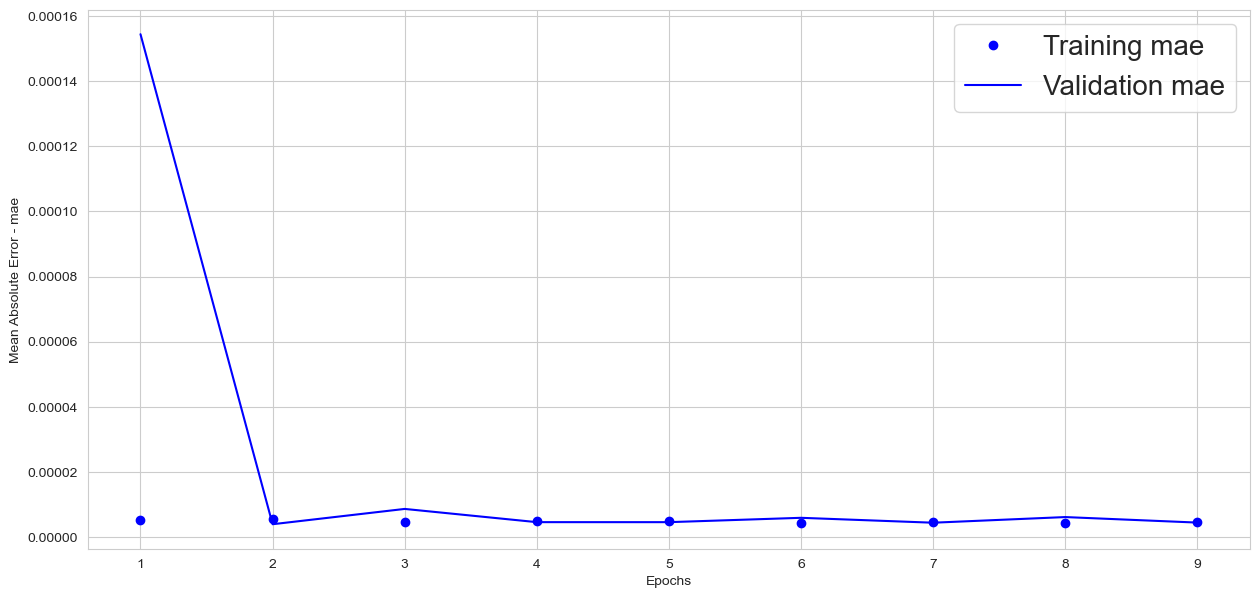

In [212]:
history_dict1 = mlp_history.history

mean_absolute_error_values = history_dict1['loss']
val_mean_absolute_error_values = history_dict1['val_loss']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

In [213]:
mlp_pred=mlp_saved_best_model(X_test)
print(mlp_pred)

tf.Tensor(
[[0.17764637 0.17929867]
 [0.17764634 0.17929867]
 [0.17764632 0.17929864]
 ...
 [0.27808133 0.27987483]
 [0.27808136 0.2798748 ]
 [0.27808133 0.2798748 ]], shape=(2995, 2), dtype=float32)


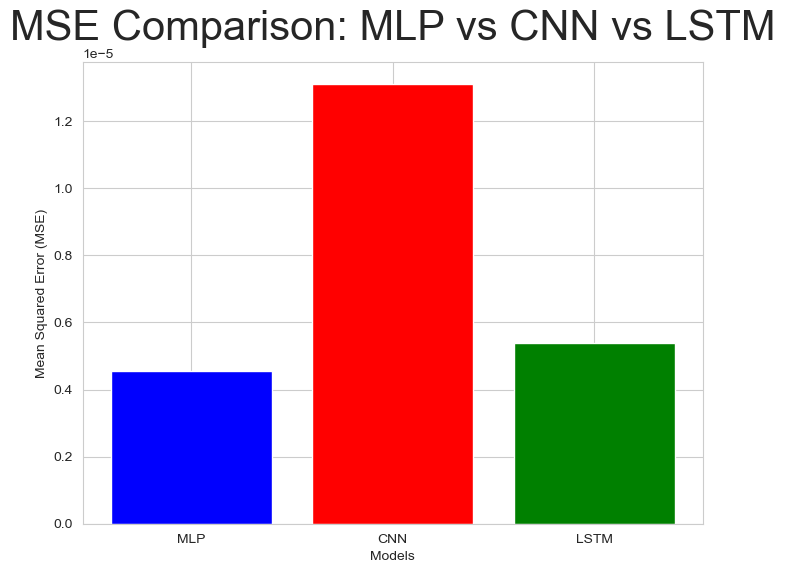

In [221]:
lstm_mse = history.history['loss'][-1]  # Final loss value (assuming MSE)
lstm_mae = history.history['mae'][-1]
cnn_mse = eval.history['loss'][-1]  # Final loss value (assuming MSE)
cnn_mae = eval.history['mae'][-1]
mlp_mse = mlp_history.history['loss'][-1]  # Final loss value (assuming MSE)
mlp_mae = mlp_history.history['mae'][-1]
models = ['Random Forest', 'LSTM']
mse_values =[mlp_mse, lstm_mse,cnn_mse]
mae_values = [mlp_mae, lstm_mae,cnn_mae]

#import matplotlib.pyplot as plt

# Ensure lengths match
models = ['MLP', 'CNN', 'LSTM']
mse_values = [mlp_mse, cnn_mse, lstm_mse]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'red', 'green'])
plt.title('MSE Comparison: MLP vs CNN vs LSTM')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.show()


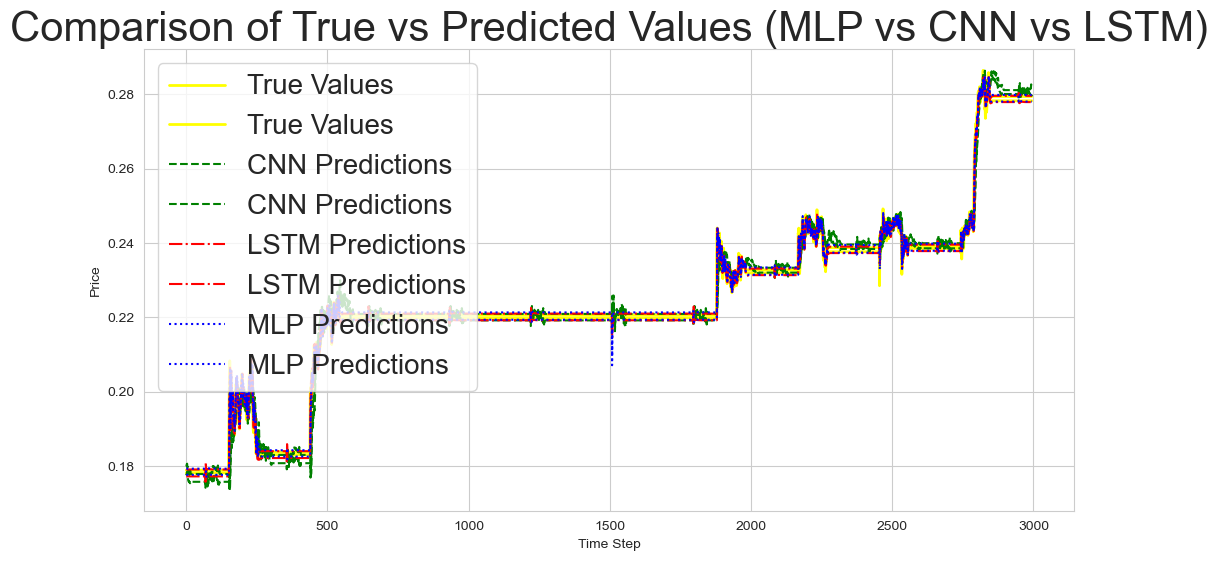

In [215]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))  # Increased figure size for better visualization

# Plot each dataset with proper labels and colors
plt.plot(y_test, label="True Values", color='yellow', linewidth=2)
plt.plot(prediction, label="CNN Predictions", color='green', linestyle='--')
plt.plot(pred, label="LSTM Predictions", color='red', linestyle='-.')
plt.plot(mlp_pred, label="MLP Predictions", color='blue', linestyle=':')

# Add legend, title, and labels
plt.legend(loc="upper left")  # Places legend in a clear location
plt.title("Comparison of True vs Predicted Values (MLP vs CNN vs LSTM)")
plt.xlabel("Time Step")  # Add X-axis label
plt.ylabel("Price")      # Add Y-axis label

# Display the plot
plt.show()


In [216]:
from sklearn.ensemble import StackingClassifier

In [217]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [234]:

stacked_predictions = np.column_stack((mlp_pred, prediction, pred))
final_model = LinearRegression()
final_model.fit(stacked_predictions, y_test)
combined_predictions = final_model.predict(stacked_predictions)
mse_stacked = mean_squared_error(y_test,combined_predictions)
print(f"MSE of Stacked Model:" ,mse_stacked)


MSE of Stacked Model: 8.2915494e-07


In [219]:
print(combined_predictions)

[[0.17815219 0.17892498]
 [0.17813143 0.17894728]
 [0.17811525 0.1789591 ]
 ...
 [0.2785979  0.27914715]
 [0.27865356 0.2791019 ]
 [0.27864373 0.2791085 ]]


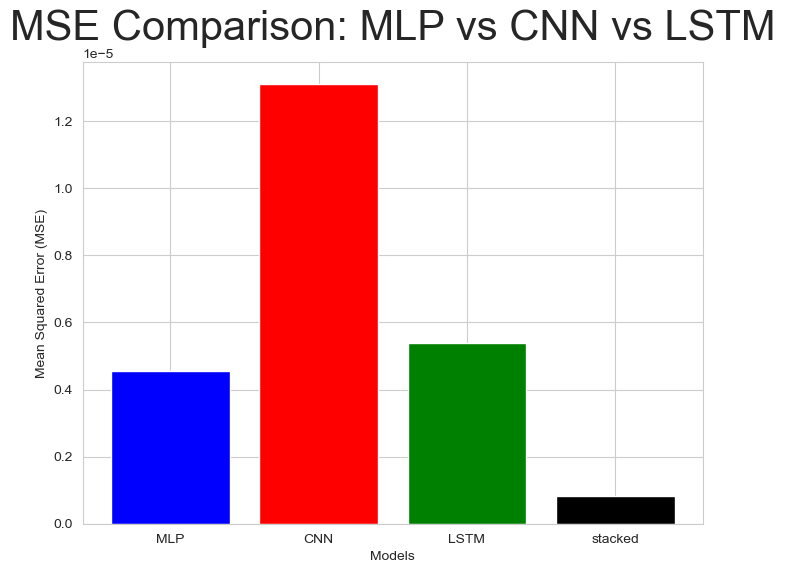

In [220]:
lstm_mse = history.history['loss'][-1]  
lstm_mae = history.history['mae'][-1]
cnn_mse = eval.history['loss'][-1]  
cnn_mae = eval.history['mae'][-1]
mlp_mse = mlp_history.history['loss'][-1] 
mlp_mae = mlp_history.history['mae'][-1]
combined_mse=mse_stacked

models = ['Random Forest', 'LSTM']
mse_values =[mlp_mse, lstm_mse,cnn_mse,mse_stacked]
mae_values = [mlp_mae, lstm_mae,cnn_mae]




models = ['MLP', 'CNN', 'LSTM','stacked']
mse_values = [mlp_mse, cnn_mse, lstm_mse,combined_mse]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'red', 'green','black'])
plt.title('MSE Comparison: MLP vs CNN vs LSTM')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.show()

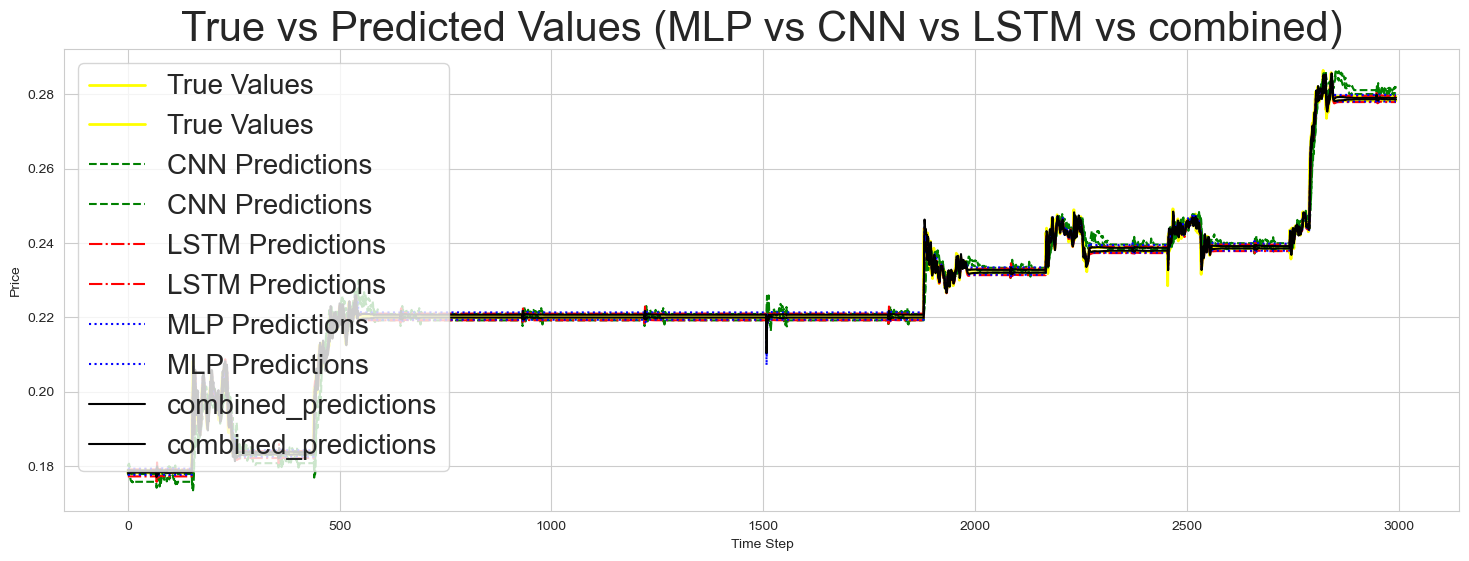

In [228]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(18, 6))  # Increased figure size for better visualization

# Plot each dataset with proper labels and colors
plt.plot(y_test, label="True Values", color='yellow', linewidth=2)
plt.plot(prediction, label="CNN Predictions", color='green', linestyle='--')
plt.plot(pred, label="LSTM Predictions", color='red', linestyle='-.')
plt.plot(mlp_pred, label="MLP Predictions", color='blue', linestyle=':')
plt.plot(combined_predictions, label="combined_predictions", color='black', linestyle='-')

# Add legend, title, and labels
plt.legend(loc="upper left")  # Places legend in a clear location
plt.title("True vs Predicted Values (MLP vs CNN vs LSTM vs combined)")
plt.xlabel("Time Step")  # Add X-axis label
plt.ylabel("Price")      # Add Y-axis label

# Display the plot
plt.show()